In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



In [2]:
BoxLength = 100
N = 1000
R = 25

np.seed = 10000

Beta = 1.0

<IPython.core.display.Javascript object>


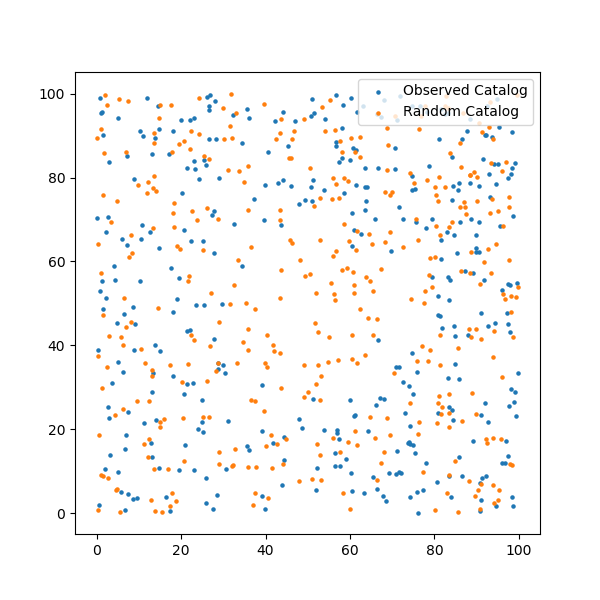

In [34]:

# Observational Catalog
filename = "BL"+ str(BoxLength)+"_SVR" + str(R) + "_N" + str(N) + ".cat"
OC = np.loadtxt(filename)


# Random Field Catalog
RC = np.zeros([N,3])

for r in RC:
    a = np.random.random()
    b = np.random.random()
    c = np.random.random()
    
    r += BoxLength * np.array([a,b,c])

slice_height = 20

fig = plt.figure(figsize=[6,6])

index = np.where( abs(OC[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(OC[index,0], OC[index,1], s=5, label="Observed Catalog")

index = np.where( abs(RC[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(RC[index,0], RC[index,1], s=5, label="Random Catalog")
plt.legend(loc=1)

#index = np.where( abs(void_cat[:,2] - BoxLength / 2) < slice_height )        
#plt.scatter(void_cat[index,0], void_cat[index,1], s=10)

plt.savefig("slice_OC_plus_RC.pdf", format="pdf")

In [4]:
# Create the full catalog, by vertical stacking Random Catalog and Obs. Catalog.

FC = np.vstack([RC,OC])

FC.shape

(2000, 3)

In [5]:
filename = "FC_N" + str(N) + ".cat"

np.savetxt(filename, FC)

#filename = "FC_N100.cat"

#with open( filename, "w") as file: 
#    for v in FC: 
#        file.write(str(v[0])+" "+str(v[1])+" "+str(v[2])+"\n")

print("Data saved to '" + filename + "'.")

Data saved to 'FC_N1000.cat'.


The random set has been created. Go to terminal and run "make BETA=3.0"

In [7]:
filename = "FC_N" + str(N) + "_Beta" + str(Beta) + ".bsk"

print(" Loading " + str(Beta) + "-Skeleton from the file: " + filename)
# Full Catalog (cat + rndm) Beta Skeleton
fcBSkel = np.loadtxt(filename)

 Loading 1.0-Skeleton from the file: FC_N1000_Beta1.0.bsk


<IPython.core.display.Javascript object>


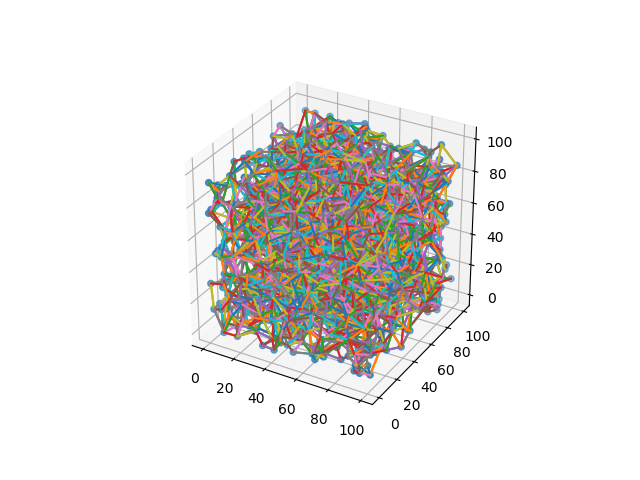

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

x = FC[:,0]
y = FC[:,1]
z = FC[:,2]

BS_size = fcBSkel.shape[0]

ax.scatter(x, y, z)

for n in range(BS_size):
    i, j = fcBSkel[n]
    
    i = int(i)
    j = int(j)
    
    ax.plot([x[i], x[j]], [y[i],y[j]], zs=[z[i],z[j]])
    
plt.show()

In [9]:
fcBSkel = fcBSkel.astype(int)

In [10]:
index = np.where( fcBSkel[:,0] < N )[0]

first_filter = fcBSkel[index].astype(int)
first_filter.shape

(7334, 2)

In [11]:
for x in fcBSkel[index]:
    print(x)

[  0 572]
[  0 658]
[   0 1337]
[   0 1893]
[   0 1972]
[   0 1049]
[  0 182]
[   0 1675]
[  1 430]
[  1 211]
[  1 765]
[  1 435]
[  1 934]
[ 1 77]
[  1 111]
[   2 1251]
[   2 1790]
[  2 697]
[   2 1065]
[   2 1475]
[  2 373]
[   2 1537]
[ 2 62]
[  3 275]
[   3 1263]
[   3 1914]
[   3 1961]
[   3 1346]
[  3 506]
[   3 1543]
[  3 950]
[  3 691]
[  3 647]
[  4 773]
[ 4 73]
[  4 829]
[ 4 37]
[   4 1556]
[   4 1586]
[  4 541]
[  5 793]
[  5 443]
[  5 789]
[  6 801]
[  6 729]
[  6 207]
[   6 1867]
[   6 1031]
[   6 1944]
[  6 838]
[  6 342]
[  6 834]
[  7 792]
[  7 980]
[   7 1116]
[   7 1720]
[   7 1565]
[   7 1490]
[  7 401]
[  7 254]
[   7 1611]
[   8 1472]
[  8 590]
[  8 503]
[  8 371]
[  8 669]
[   8 1320]
[   8 1214]
[  8 175]
[  9 823]
[   9 1318]
[   9 1360]
[   9 1307]
[  9 220]
[  9 184]
[ 10 205]
[ 10 329]
[  10 1776]
[  10 1212]
[ 11 782]
[ 11 567]
[ 11 111]
[  11 1140]
[ 11 705]
[  11 1835]
[  11 1916]
[ 11 435]
[  11 1821]
[  12 1542]
[ 12 115]
[ 12 793]
[ 12 473]
[ 12 531]
[ 

[155 386]
[ 155 1739]
[155 664]
[155 450]
[ 155 1489]
[ 156 1768]
[156 663]
[ 156 1397]
[156 595]
[ 156 1133]
[156  53]
[156 566]
[ 156 1099]
[156 405]
[157 862]
[157 902]
[ 157 1291]
[ 157 1390]
[157 243]
[ 157 1594]
[ 157 1361]
[ 157 1678]
[ 158 1451]
[ 158 1392]
[158 741]
[ 158 1929]
[ 158 1413]
[ 158 1915]
[ 158 1664]
[ 158 1345]
[159 758]
[159 740]
[159 852]
[ 159 1411]
[ 159 1334]
[159 763]
[ 159 1817]
[ 160 1847]
[ 160 1497]
[ 160 1038]
[160 542]
[160 704]
[160 982]
[160 276]
[ 161 1198]
[ 161 1235]
[161 372]
[161 248]
[ 161 1684]
[161 832]
[ 161 1167]
[ 161 1029]
[ 161 1842]
[162 164]
[ 162 1638]
[162 261]
[162 557]
[ 162 1128]
[ 162 1417]
[ 162 1138]
[ 163 1755]
[ 163 1323]
[ 163 1770]
[ 163 1654]
[ 163 1455]
[ 163 1740]
[163 639]
[ 163 1331]
[164 162]
[ 164 1904]
[164 261]
[164 685]
[ 164 1138]
[ 164 1940]
[165 623]
[ 165 1283]
[ 165 1436]
[ 165 1559]
[ 165 1272]
[ 165 1958]
[ 165 1062]
[166 732]
[166 204]
[ 166 1392]
[ 166 1244]
[ 166 1288]
[ 166 1915]
[166 629]
[ 167 1924]


[ 377 1675]
[377 336]
[377  54]
[378 983]
[378 151]
[378 411]
[378 992]
[378  63]
[ 378 1259]
[ 379 1634]
[379 878]
[ 379 1273]
[ 379 1750]
[ 380 1107]
[380 944]
[380 220]
[ 380 1943]
[380 932]
[ 381 1919]
[ 381 1841]
[ 381 1820]
[ 381 1571]
[381  84]
[381 856]
[381 315]
[ 381 1123]
[ 382 1757]
[ 382 1447]
[ 382 1996]
[382 779]
[382 184]
[ 382 1977]
[ 383 1567]
[383 837]
[383 653]
[383 134]
[ 383 1987]
[ 383 1188]
[ 383 1721]
[ 383 1633]
[ 383 1589]
[384 276]
[384  30]
[384 704]
[ 384 1038]
[384 628]
[ 384 1481]
[ 384 1321]
[ 385 1618]
[ 385 1203]
[385 230]
[385 843]
[385 719]
[386 155]
[ 386 1335]
[386 664]
[386 789]
[ 386 1564]
[386 770]
[386  12]
[386 794]
[ 387 1607]
[ 387 1217]
[387 550]
[ 387 1684]
[ 387 1863]
[ 387 1572]
[387 283]
[ 387 1931]
[ 387 1842]
[ 387 1177]
[387 309]
[387  40]
[ 388 1193]
[388 577]
[388 516]
[388 191]
[388 137]
[388 169]
[388 343]
[389 231]
[389 741]
[ 389 1451]
[389 651]
[389  88]
[ 389 1929]
[ 389 1509]
[ 390 1752]
[ 390 1486]
[ 390 1399]
[ 390 1310]


[ 514 1378]
[ 514 1977]
[ 514 1989]
[ 515 1942]
[515 293]
[ 515 1966]
[515 376]
[515 100]
[ 515 1285]
[515 533]
[515 277]
[515 872]
[515 871]
[516 969]
[516  98]
[516 388]
[ 516 1964]
[ 516 1744]
[516 169]
[ 516 1020]
[516 343]
[516 814]
[ 517 1895]
[ 517 1966]
[ 517 1279]
[517 376]
[ 517 1952]
[ 517 1720]
[517 792]
[517 991]
[ 517 1369]
[517 871]
[517 395]
[518 825]
[518 406]
[ 518 1002]
[518 802]
[518 291]
[518  90]
[ 518 1526]
[ 519 1780]
[519 613]
[519 480]
[519 744]
[ 519 1418]
[519  31]
[520 512]
[520 887]
[ 520 1998]
[520  81]
[ 520 1509]
[ 520 1719]
[520 231]
[521 219]
[521  50]
[521 660]
[521 106]
[521 625]
[521 860]
[521 616]
[521 405]
[521 153]
[ 522 1252]
[522 401]
[522 929]
[ 522 1685]
[ 522 1268]
[ 522 1302]
[522 335]
[522 149]
[522 895]
[522 193]
[522 933]
[522 279]
[ 522 1249]
[522 223]
[523 872]
[ 523 1255]
[ 523 1960]
[523 667]
[523  41]
[523 662]
[523 735]
[ 523 1285]
[524 988]
[524 980]
[524 792]
[524 395]
[525 959]
[525 406]
[525 688]
[525 825]
[ 525 1826]
[525 634

[ 649 1618]
[649 230]
[ 649 1503]
[ 649 1482]
[ 650 1364]
[ 650 1494]
[ 650 1469]
[ 650 1991]
[ 650 1129]
[ 650 1204]
[ 650 1883]
[650 260]
[ 651 1003]
[651 741]
[ 651 1771]
[ 651 1451]
[651 397]
[651 389]
[651 600]
[ 651 1044]
[652 484]
[652 990]
[652  40]
[ 652 1166]
[652 283]
[652 526]
[652  39]
[652 201]
[653 837]
[653 383]
[ 653 1146]
[653 956]
[ 653 1567]
[ 653 1721]
[ 653 1271]
[653 569]
[ 653 1126]
[ 653 1468]
[ 654 1341]
[654 734]
[654 451]
[654 918]
[ 654 1348]
[654 766]
[ 654 1993]
[ 654 1174]
[654  71]
[ 655 1846]
[ 655 1827]
[655 807]
[655  75]
[656 546]
[656 419]
[ 656 1562]
[ 656 1109]
[ 656 1476]
[ 657 1493]
[ 657 1301]
[ 657 1391]
[ 657 1817]
[657 879]
[657 781]
[657 546]
[ 658 1676]
[658   0]
[ 658 1488]
[ 658 1137]
[ 658 1049]
[ 658 1972]
[ 658 1675]
[ 659 1792]
[ 659 1329]
[659 134]
[659  79]
[ 659 1664]
[ 659 1429]
[ 659 1413]
[659  88]
[660 415]
[660 966]
[660 427]
[660 921]
[660 521]
[660  50]
[660 405]
[660 153]
[660 696]
[660 765]
[661 501]
[ 661 1908]
[ 661 14

[782 701]
[782 813]
[782 435]
[782 567]
[782 705]
[783 689]
[783 605]
[783  75]
[784 222]
[ 784 1356]
[784 859]
[ 784 1136]
[ 784 1987]
[784 440]
[ 785 1213]
[ 785 1453]
[ 785 1615]
[785 227]
[ 785 1067]
[ 785 1343]
[ 785 1762]
[ 786 1296]
[ 786 1647]
[ 786 1285]
[786 507]
[786 965]
[787 812]
[ 787 1891]
[787 952]
[ 787 1119]
[ 787 1525]
[787 853]
[787 289]
[788 465]
[ 788 1210]
[788 351]
[ 788 1200]
[788 315]
[ 788 1659]
[ 788 1473]
[ 789 1803]
[789   5]
[789 793]
[ 789 1905]
[789 443]
[789 362]
[789 386]
[789 336]
[789 676]
[ 790 1815]
[790 805]
[790 851]
[790 404]
[ 790 1794]
[ 790 1484]
[ 790 1902]
[790 928]
[ 790 1377]
[ 790 1950]
[790 827]
[790 666]
[ 790 1541]
[791 328]
[ 791 1569]
[791 364]
[ 791 1825]
[ 791 1960]
[791 540]
[791  78]
[ 791 1954]
[792 980]
[792 524]
[792   7]
[ 792 1720]
[ 792 1952]
[ 792 1490]
[792 517]
[ 792 1908]
[792 376]
[792 501]
[793   5]
[ 793 1564]
[793 115]
[793 362]
[793  12]
[793 789]
[ 794 1111]
[ 794 1247]
[794 770]
[794 386]
[ 795 1454]
[795 400]


[ 924 1305]
[924  56]
[ 924 1123]
[924 255]
[924 820]
[ 925 1087]
[925  20]
[925 167]
[ 925 1924]
[925 682]
[925  19]
[ 925 1967]
[926  43]
[926 885]
[ 926 1116]
[ 926 1415]
[926 119]
[927 461]
[ 927 1369]
[ 927 1414]
[927 614]
[927 258]
[927 643]
[927 432]
[927  53]
[927  72]
[ 927 1968]
[927 606]
[927 471]
[ 928 1681]
[ 928 1901]
[928 666]
[ 928 1377]
[ 928 1794]
[928 790]
[ 928 1601]
[929 424]
[929 209]
[ 929 1873]
[929 522]
[929 717]
[929 190]
[ 930 1678]
[930 707]
[930  49]
[930 728]
[ 930 1361]
[931 224]
[ 931 1709]
[931 347]
[931 958]
[ 931 1367]
[ 931 1450]
[932  16]
[ 932 1651]
[932 527]
[932 266]
[ 932 1375]
[932 771]
[932 823]
[932 380]
[ 932 1943]
[933 274]
[933 279]
[ 933 1249]
[ 933 1252]
[933 522]
[934 126]
[934 353]
[934 964]
[934 718]
[934   1]
[935 452]
[935 223]
[935 441]
[935 474]
[ 935 1264]
[935 885]
[ 935 1611]
[ 935 1443]
[935 214]
[ 935 1565]
[936 830]
[ 936 1691]
[936 246]
[ 936 1686]
[936  64]
[936 677]
[936 663]
[936 850]
[ 936 1362]
[ 937 1940]
[937 685]
[ 

<IPython.core.display.Javascript object>


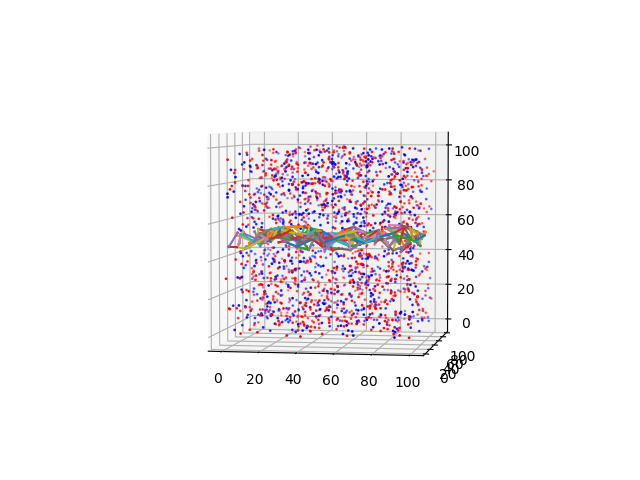

In [32]:
BetaSkeleton = first_filter


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


x = FC[:,0]
y = FC[:,1]
z = FC[:,2]

# Random Points
x_r = FC[:N,0]
y_r = FC[:N,1]
z_r = FC[:N,2]


ax.scatter(x_r, y_r, z_r, c="blue", s=1)

# Random Points
x_o = FC[N:,0]
y_o = FC[N:,1]
z_o = FC[N:,2]

ax.scatter(x_o, y_o, z_o, c="red", s=1)

slice_height = 5

BS_size = BetaSkeleton.shape[0]
for n in range( BS_size ):
    i, j = BetaSkeleton[n]
    #print (BetaSkeleton[n])
    
    i = int(i)
    j = int(j)
    
    if( (abs(z[i] - BoxLength/2) < slice_height)
        &(abs(z[j] - BoxLength/2) < slice_height) ):
        ax.plot(xs=[x[i], x[j]], ys=[y[i],y[j]], zs=[z[i],z[j]])
    
plt.show()

In [13]:
index = np.where( first_filter[:,1] >= N )[0]
droplist_raw = first_filter[index,0]

In [14]:
droplist = set(droplist_raw)

In [15]:
len(droplist)

952

In [18]:
droplist

{0,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 74,
 75,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 113,
 114,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 19

In [19]:
rndmcat_index = set(range(N))

candidates = rndmcat_index.difference(droplist)
candidates = list(candidates)
void_cat = FC[candidates]

In [29]:
def IsInsideVoid(v):
    # Position vector components
    x = v[0]
    y = v[1]
    z = v[2]
    
    # Void sphere center
    x0 = 0.50 * BoxLength
    y0 = 0.50 * BoxLength
    z0 = 0.50 * BoxLength

    # Distance to the void center
    d = ( (x0 - x)**2 + (y0 - y)**2 + (z0 - z)**2)**0.5 
    
    if ( d < R ):
        return 1;
    else:
        return 0;

<IPython.core.display.Javascript object>


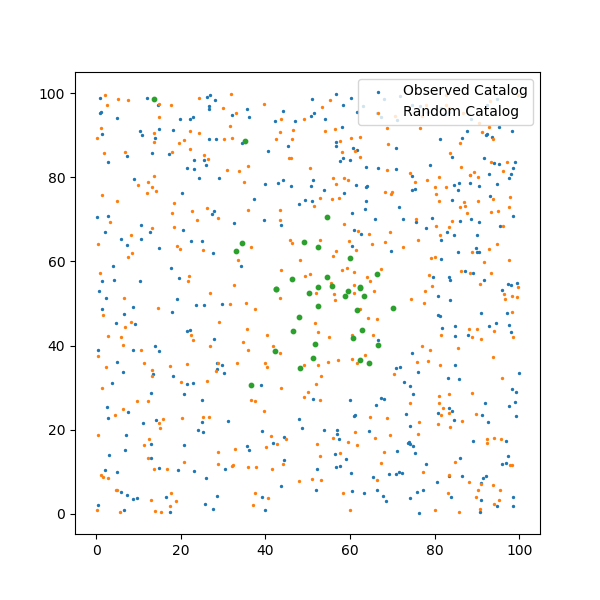

In [35]:
slice_height = 20

fig = plt.figure(figsize=[6,6])

index = np.where( abs(OC[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(OC[index,0], OC[index,1], s=2, label="Observed Catalog")

index = np.where( abs(RC[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(RC[index,0], RC[index,1], s=2, label="Random Catalog")
plt.legend(loc=1)

index = np.where( abs(void_cat[:,2] - BoxLength / 2) < slice_height )        
plt.scatter(void_cat[index,0], void_cat[index,1], s=10, label="Identified As Void")

plt.savefig("slice_OC_RC_VoidPoints.pdf", format="pdf")

(48, 3)


<IPython.core.display.Javascript object>


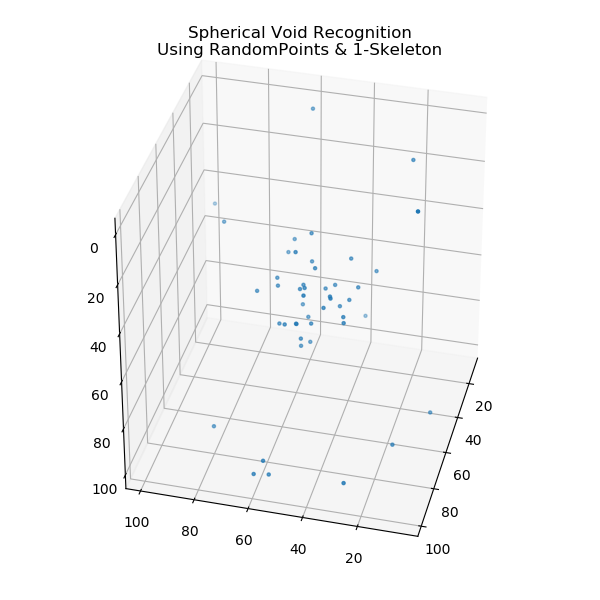

In [31]:
sphere = void_cat
print(sphere.shape)

x = sphere[:,0]
y = sphere[:,1]
z = sphere[:,2]

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=5)
ax.view_init(30, 30)

plt.title("Spherical Void Recognition\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()
#plt.savefig("IrregularVoidSurface_for_" + a_label + "-" + b_label + "-skeletons.pdf")
#plt.close()

plt.show()

In [ ]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

ax.scatter(x, y, z, s=5)
ax.view_init(30, 30)

plt.title("Spherical Void Recognition\nUsing RandomPoints & 1-Skeleton")
plt.tight_layout()
#plt.savefig("IrregularVoidSurface_for_" + a_label + "-" + b_label + "-skeletons.pdf")
#plt.close()

plt.show()



In [ ]:
for n in range( BS_size ):
    i, j = BetaSkeleton[n]
    #print (BetaSkeleton[n])
    
    i = int(i)
    j = int(j)
    
    if( (abs(z[i] - BoxLength/2) < slice_height)
        &(abs(z[j] - BoxLength/2) < slice_height) ):
        ax.plot(xs=[x[i], x[j]], ys=[y[i],y[j]], zs=[z[i],z[j]])

In [38]:
BetaSkeleton[np.where( BetaSkeleton[:,0]==candidates)]

/home/filipo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], shape=(0, 2), dtype=int64)